In [1]:
print('kernel started successfully')

kernel started successfully


In [37]:
import six.moves.cPickle as Pickle
import os

print('loading data..')
dataset_dir = 'C://Users/HSS/lookbook/lookbook/data'
models = []
clothes = []

for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'):
        if filename.split('_')[1].endswith('0'):
            models.append(filename)
        else:
            clothes.append(filename)

print(len(models))
print(len(clothes))
print('appending data..')
i = 0
match = []
while i < len(clothes):
    pid = clothes[i][3:9]
    match_i = []
    j = 0
    while j < len(models):
        if models[j][3:9] == pid:
            match_i.append(models[j])
        j += 1
    match.append(match_i)
    i += 1
    if i % 200 == 0:
        print(i)

with open('cloth_table.pkl', 'wb') as cloth_table:
    Pickle.dump(clothes, cloth_table)
with open('model_table.pkl', 'wb') as model_table:
    Pickle.dump(match, model_table)

print('done')

loading data..
68820
8726
appending data..
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
done


In [78]:
import six.moves.cPickle as Pickle
import torch as th
import cv2
import numpy as np
import os

In [75]:
def loadImage(path):
    inImage_ = cv2.imread(path)
    inImage = cv2.cvtColor(inImage_, cv2.COLOR_RGB2BGR)
    info = np.iinfo(inImage.dtype)
    inImage = inImage.astype(np.float) / info.max

    iw = inImage.shape[1]
    ih = inImage.shape[0]
    if iw < ih:
        inImage = cv2.resize(inImage, (64, int(64 * ih/iw)))
    else:
        inImage = cv2.resize(inImage, (int(64 * iw / ih), 64))
    inImage = inImage[0:64, 0:64]
    return th.from_numpy(2 * inImage - 1).transpose(0, 2).transpose(
        1, 2
    )


class LookbookDataset():
    def __init__(self, data_dir, index_dir):
        self.data_dir = data_dir
        with open(index_dir+'cloth_table.pkl', 'rb') as cloth:
            self.cloth_table = Pickle.load(cloth)
        with open(index_dir+'model_table.pkl', 'rb') as model:
            self.model_table = Pickle.load(model)

        self.cn = len(self.cloth_table)
        self.path = data_dir

    def getbatch(self, batchsize):
        batch1 = []
        batch2 = []
        batch3 = []
        for i in range(batchsize):
            seed = th.randint(1, 100000, (1,)).item()
            th.manual_seed((i+1)*seed)
            r1 = th.randint(0, self.cn, (1,)).item()
            r2 = th.randint(0, self.cn, (1,)).item()
            r1 = int(r1)
            r2 = int(r2)
            mn = len(self.model_table[r1])
            r3 = th.randint(0, mn, (1,)).item()
            r3 = int(r3)

            path1 = self.cloth_table[r1]
            path2 = self.cloth_table[r2]
            path3 = self.model_table[r1][r3]
        
            img1 = loadImage(self.path + path1)
            img2 = loadImage(self.path + path2)
            img3 = loadImage(self.path + path3)
            batch1.append(img1)
            batch2.append(img2)
            batch3.append(img3)
        return th.stack(batch1), th.stack(batch2), th.stack(batch3)
    
dataset = LookbookDataset(data_dir = "C://Users/HSS/lookbook/lookbook/data",index_dir = 'C://Users/HSS/lookbook/tool/')

In [135]:
dataset = []
for i in (clothes):
    new_path  = 'C://Users/HSS/lookbook/lookbook/data/'+str(i)
    dataset.append(new_path)
print(dataset)


['C://Users/HSS/lookbook/lookbook/data/PID000000_CLEAN1_IID000011.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000001_CLEAN1_IID000029.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000002_CLEAN1_IID000048.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000003_CLEAN1_IID000065.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000004_CLEAN1_IID000086.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000005_CLEAN1_IID000102.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000006_CLEAN1_IID000120.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000007_CLEAN1_IID000136.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000008_CLEAN1_IID000152.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000009_CLEAN1_IID000169.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000010_CLEAN1_IID000189.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000011_CLEAN1_IID000206.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000012_CLEAN1_IID000219.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000013_CLEAN1_IID000232.jpg', 'C://

In [153]:
len(dataset)
sample = []
i = 0
while i <= len(dataset)-1:
    if i%100 == 0:
        print(str(i)+'/'+str(len(dataset))+'completed')
    sample.append(loadImage(dataset[i]))
    i += 1

0/8727completed
100/8727completed
200/8727completed
300/8727completed
400/8727completed
500/8727completed
600/8727completed
700/8727completed
800/8727completed
900/8727completed
1000/8727completed
1100/8727completed
1200/8727completed
1300/8727completed
1400/8727completed
1500/8727completed
1600/8727completed
1700/8727completed
1800/8727completed
1900/8727completed
2000/8727completed
2100/8727completed
2200/8727completed
2300/8727completed
2400/8727completed
2500/8727completed
2600/8727completed
2700/8727completed
2800/8727completed
2900/8727completed
3000/8727completed
3100/8727completed
3200/8727completed
3300/8727completed
3400/8727completed
3500/8727completed
3600/8727completed
3700/8727completed
3800/8727completed
3900/8727completed
4000/8727completed
4100/8727completed
4200/8727completed
4300/8727completed
4400/8727completed
4500/8727completed
4600/8727completed
4700/8727completed
4800/8727completed
4900/8727completed
5000/8727completed
5100/8727completed
5200/8727completed
5300/

In [107]:
import sklearn.preprocessing
import numpy as np
import pandas as pd
import scipy.spatial.distance
import operator
from scipy import linalg
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
print(type(sample))

<class 'list'>


In [154]:
PID = 'sample2.png'
PATH = 'C://Users/HSS/lookbook/lookbook/data/'+ PID

sam = Image.open(PATH)
sam64 = sam.resize((64,64))
npsam = np.array(sam64).astype(np.uint8)[:,:,:3]
d = npsam.transpose([2,0,1])
# print(type(npsam))
# print(npsam.shape)
# print(npsam)
print(npsam.shape)
# print(d.shape)
d = d.tolist()
print(type(sample))
print(type(d))
sample.append(d)


(64, 64, 3)
<class 'list'>
<class 'list'>


In [155]:

for x in range(len(sample)):
    sample[x] = np.array(sample[x])
    if x % 100 == 0:
        print(x,"/",str(len(sample)))
print('done')

0 / 8728
100 / 8728
200 / 8728
300 / 8728
400 / 8728
500 / 8728
600 / 8728
700 / 8728
800 / 8728
900 / 8728
1000 / 8728
1100 / 8728
1200 / 8728
1300 / 8728
1400 / 8728
1500 / 8728
1600 / 8728
1700 / 8728
1800 / 8728
1900 / 8728
2000 / 8728
2100 / 8728
2200 / 8728
2300 / 8728
2400 / 8728
2500 / 8728
2600 / 8728
2700 / 8728
2800 / 8728
2900 / 8728
3000 / 8728
3100 / 8728
3200 / 8728
3300 / 8728
3400 / 8728
3500 / 8728
3600 / 8728
3700 / 8728
3800 / 8728
3900 / 8728
4000 / 8728
4100 / 8728
4200 / 8728
4300 / 8728
4400 / 8728
4500 / 8728
4600 / 8728
4700 / 8728
4800 / 8728
4900 / 8728
5000 / 8728
5100 / 8728
5200 / 8728
5300 / 8728
5400 / 8728
5500 / 8728
5600 / 8728
5700 / 8728
5800 / 8728
5900 / 8728
6000 / 8728
6100 / 8728
6200 / 8728
6300 / 8728
6400 / 8728
6500 / 8728
6600 / 8728
6700 / 8728
6800 / 8728
6900 / 8728
7000 / 8728
7100 / 8728
7200 / 8728
7300 / 8728
7400 / 8728
7500 / 8728
7600 / 8728
7700 / 8728
7800 / 8728
7900 / 8728
8000 / 8728
8100 / 8728
8200 / 8728
8300 / 8728
8400

In [156]:
print(type(sample))
sample = np.array(sample)
print(sample.shape)
sample = sample.reshape(sample.shape[0],3*64*64)



<class 'list'>
(8728, 3, 64, 64)


In [157]:
print(sample.shape)

(8728, 12288)


In [158]:
print('this will take a while, ready for the impact!')
pca_model = PCA(n_components = 6)

sample_array = pca_model.fit_transform(sample)

this will take a while, ready for the impact!


In [ ]:
# if you want to visuallize
# len(sample_array)
x = []
y = []
z = []
for i in range(len(sample_array)):
    x.append(sample_array[i][0])
    y.append(sample_array[i][1])

In [ ]:
plt.scatter(x,y,marker = '+', norm = 0)

In [159]:
dataset.append(PATH)
new_dict = {}
for i in range(len(dataset)):
    new_dict[dataset[i]] = sample_array[i]
print(new_dict)

{'C://Users/HSS/lookbook/lookbook/data/PID000100_CLEAN1_IID001422.jpg': array([ 12.47072087, -27.65570113,   9.96973556,   5.23037771,
        -1.30603096,   2.91426838]), 'C://Users/HSS/lookbook/lookbook/data/PID000073_CLEAN1_IID001044.jpg': array([-23.67404742, -10.71584907,  15.60505715,   4.69575731,
        -4.59088824,   1.90856995]), 'C://Users/HSS/lookbook/lookbook/data/PID006365_CLEAN1_IID059028.jpg': array([ 2.39973248e+01, -4.11411162e+01,  2.47692960e+00,  6.06498799e+00,
        1.35648143e+00, -3.18066721e-02]), 'C://Users/HSS/lookbook/lookbook/data/PID001139_CLEAN1_IID013030.jpg': array([-11.52704872,  10.23820463,  -4.29485645, -27.23533742,
       -20.41017254,  14.96079776]), 'C://Users/HSS/lookbook/lookbook/data/PID004916_CLEAN1_IID047662.jpg': array([ -7.44625071,  18.60699374, -10.51307282, -21.21509033,
         1.41234673,  -8.68501835]), 'C://Users/HSS/lookbook/lookbook/data/PID006532_CLEAN1_IID059801.jpg': array([ 22.31541287, -29.82661474,   7.65549021,  11.80

In [49]:
# def pca(data):
#     data.reshape(data.shape[0],64*64*3)
#     pca_model = PCA(n_components=6)
#     result = pca_model.fit_transform(data)
#     return result

In [116]:
# # print(sample_array.shape)
# PID = 'sample1.png'
# PATH = 'C://Users/HSS/lookbook/lookbook/data/'+ PID

# sam = Image.open(PATH)
# sam64 = sam.resize((64,64))
# npsam = np.array(sam64).astype(np.uint8)[:,:,:3]
# # print(type(npsam))
# # print(npsam.shape)
# # print(npsam)

# d= npsam.reshape(1,64*64*3)
# # print(d.shape)
# print(pca(d))

(8727, 6)


In [160]:
from scipy.spatial.distance import cosine

def get_closest_jpg(maps, PID, num):
    new_dict = maps
    PID = 'C://Users/HSS/lookbook/lookbook/data/'+ PID
    distance = {}
    standard = new_dict[PID]
    
#     for i in range(len(new_dict)): 
#         distance[new_dict[i]] = scipy.spatial.distance.euclidean(standard, new_dict[i])
    print(len(new_dict))
    
    for i in new_dict.keys():
        distance[i] = scipy.spatial.distance.euclidean(standard, new_dict[i])
    sorted_distance = sorted(distance.items(), key = operator.itemgetter(1))
    result = sorted_distance[0:num]
    
#     co_distance = {}
#     for i in new_dict.keys():
#         co_distance[i] = cosine(standard, new_dict[i])
#     sorted_co_distance = sorted(co_distance.items(), key = operator.itemgetter(1))
#     result2 = sorted_co_distance[0:num]
    
#     result2 = co_distance.sort(key=lambda X: X[1])
    
    print(result)
    return  result



In [180]:
import time
start_time  = time.time()
search_result = get_closest_jpg(new_dict,'sample2.png', 10 )
print('Time consumed for search :' , time.time() - start_time)

from PIL import Image

# input = 'C://Users/HSS/lookbook/lookbook/data/PID003524_CLEAN1_IID034328.jpg'
# Image.open(input)
# len(search_result)


i = 0
idx = []
while i <= len(search_result)-1:
    idx.append(search_result[i][0])
    i+=1
print(idx)


8728
[('C://Users/HSS/lookbook/lookbook/data/sample2.png', 0.0), ('C://Users/HSS/lookbook/lookbook/data/PID006585_CLEAN1_IID060150.jpg', 20754.412941656283), ('C://Users/HSS/lookbook/lookbook/data/PID007001_CLEAN1_IID062825.jpg', 20755.193727159058), ('C://Users/HSS/lookbook/lookbook/data/PID007760_CLEAN1_IID066735.jpg', 20755.386922194637), ('C://Users/HSS/lookbook/lookbook/data/PID006857_CLEAN1_IID062023.jpg', 20755.71063169025), ('C://Users/HSS/lookbook/lookbook/data/PID007990_CLEAN1_IID069338.jpg', 20755.771998287968), ('C://Users/HSS/lookbook/lookbook/data/PID004771_CLEAN1_IID046675.jpg', 20755.88403433067), ('C://Users/HSS/lookbook/lookbook/data/PID006115_CLEAN1_IID057095.jpg', 20755.910406857947), ('C://Users/HSS/lookbook/lookbook/data/PID006718_CLEAN1_IID061261.jpg', 20755.918113320924), ('C://Users/HSS/lookbook/lookbook/data/PID007925_CLEAN1_IID068524.jpg', 20755.92176572741)]
Time consumed for search : 0.16690444946289062
['C://Users/HSS/lookbook/lookbook/data/sample2.png', '

In [181]:
new_dict[PATH]

array([ 2.08076296e+04,  4.14214637e+02,  9.99937047e+01,  1.39662566e+01,
       -9.19913061e+00,  1.28519078e+01])

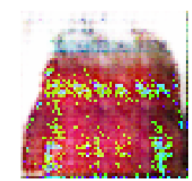

In [182]:
Image.open(idx[0])

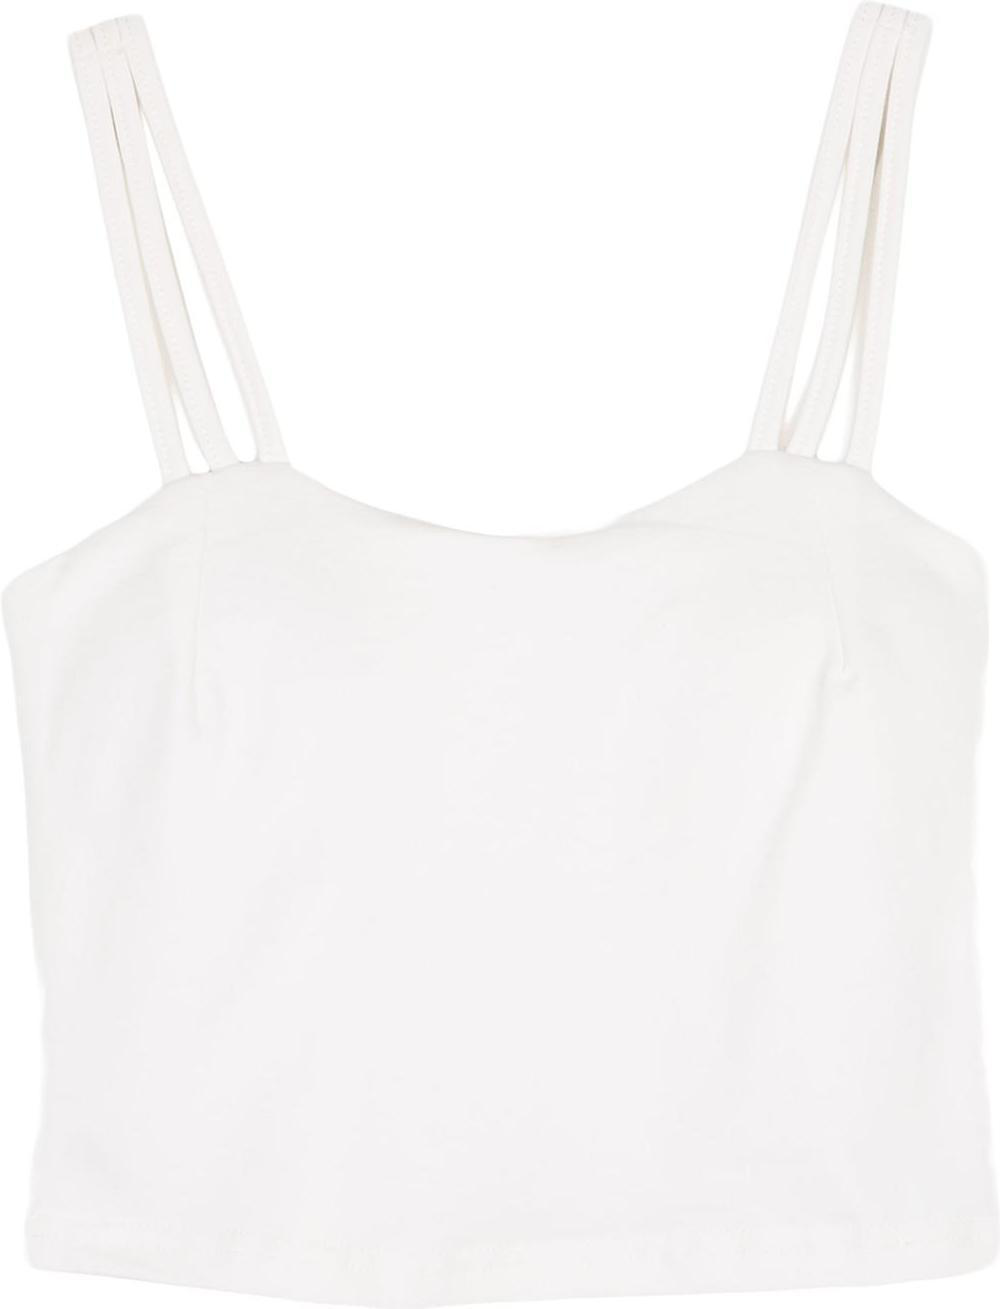

In [183]:
Image.open(idx[1])

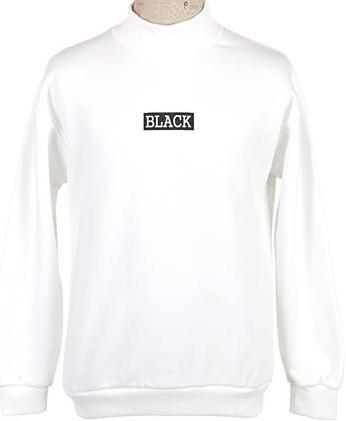

In [184]:
Image.open(idx[2])

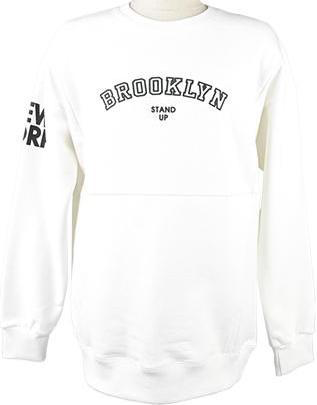

In [185]:
Image.open(idx[3])

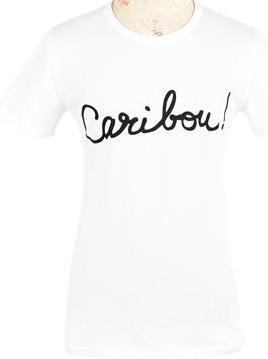

In [186]:
Image.open(idx[4])

AttributeError: 'str' object has no attribute 'astype'

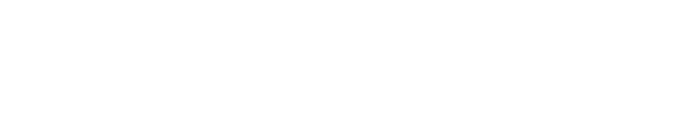

In [150]:
from PIL import Image

def PIL2array(img):
    return np.array(img.getdata(),
                    np.uint8).reshape(img.size[1], img.size[0], 3)

blank2 = []
a=0
print('appending started')

for ii in range(len(idx)):
    imgs=[Image.open(i) for i in idx[ii]]
    blank = []
    for x in imgs:
        blank.append(PIL2array(x))
    blank2.append(blank)
    a+=1
    print(a,'/24')
print('appending finished')
print(len(blank2))

def plot(samples):
      
    fig = plt.figure(figsize=(60,30))
    gs = gridspec.GridSpec(20,5)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        sample = sample.astype(np.uint8)
        a = plt.imshow(sample)
# PRINT(blank[0])

prin
plot(blank2[23])
plt.savefig('cl23.png')